In [1]:
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

#Modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

#Evaluation libraries
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

## Importing final dataset

In [2]:
file = 'mean_replaced_nan_df.csv'
mean_imputed_df = pd.read_csv(file)

In [3]:
mean_imputed_df.drop('Unnamed: 0', axis = 1,inplace = True)
mean_imputed_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.083337,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


___

## Data Visualization

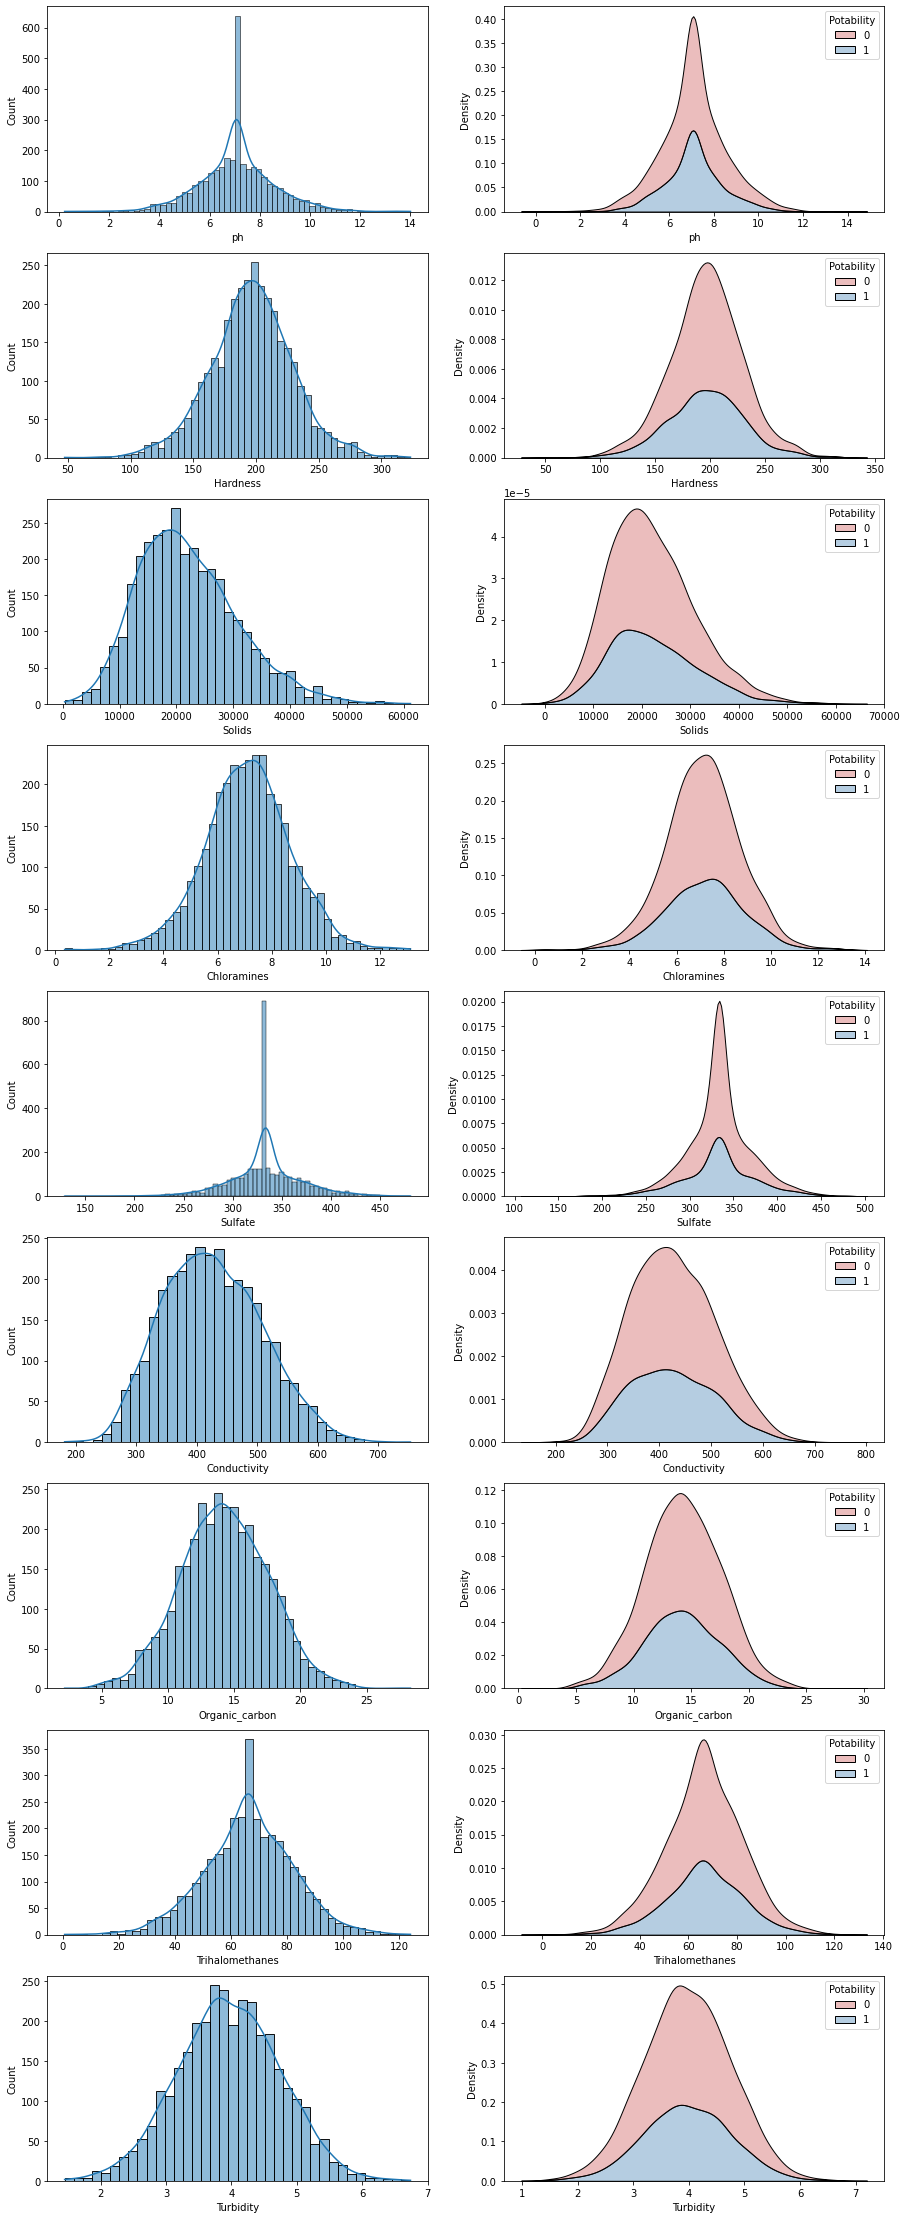

In [4]:
#Creating a list of features from the dataset to iterate through 
features = list(mean_imputed_df.columns.drop(['Potability']))

#Establishing plots and plot sizes
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(15, 40))
i = 0

#Creating loop to generate KDE plot and histogram for each feature
for col in features: 
    sns.histplot(mean_imputed_df, x=col, kde=True, ax = ax[i,0]) 
    
    #Setting hue as 'Potability' to see how it is affected
    sns.kdeplot(mean_imputed_df[col], fill=True, alpha=0.4, hue = mean_imputed_df.Potability, 
    palette=('indianred', 'steelblue'), multiple='stack', ax=ax[i,1])
    
    i = i + 1

___

## Assessing correlation between features in the dataset

In [5]:
#Creating a correlation matrix to determine how correlated features are in the dataset
corr_matrix = mean_imputed_df.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.076937,-0.077549,-0.031205,0.014468,0.020109,0.037256,0.004055,-0.034537,-0.004495
Hardness,0.076937,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.077549,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031205,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014468,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.020109,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.037256,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.004055,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.034537,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.004495,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<AxesSubplot:>

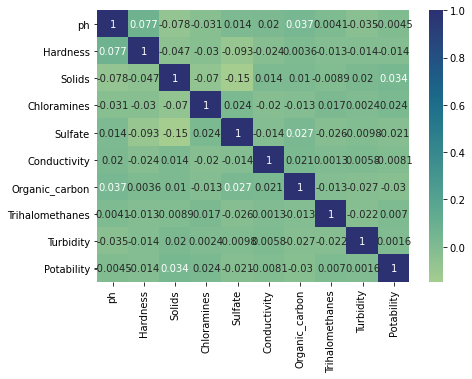

In [6]:
#Creating a heatmap of the correlation matrix for easier visual analysis
plt.subplots(figsize=(7,5))
sns.heatmap(corr_matrix, cmap = 'crest', annot = True)

**There is no multicollinearity among features in the dataset because none of the Pearson's Correlation Coefficients are close to -1 or 1. Next I will create a list of the features and how they correlate with the target feature, Potability.**

In [7]:
#Instantiate an empty list of correlation values
corr = list()

#Looping through the previous list of features to determine correlation with target feature, 'Potability'
for cols in features:
    corr.append(mean_imputed_df[cols].corr(mean_imputed_df['Potability']))
    
#Converting new correlation list to a pandas dataframe
corr_df = pd.DataFrame({'Features' : features, 'corr': corr})

#Finding the absolute values to be able to correctly order values 
corr_df['corr'] = corr_df['corr'].abs()

#Ordering the values in descending orders to see which features are most correlated with the target feature
corr_df.sort_values(by = 'corr', ascending = False)

,Features,corr
2,Solids,0.033743
6,Organic_carbon,0.030001
3,Chloramines,0.023779
4,Sulfate,0.020619
1,Hardness,0.013837
5,Conductivity,0.008128
7,Trihalomethanes,0.006960
0,ph,0.004495
8,Turbidity,0.001581


In [8]:
df = mean_imputed_df
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.083337,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


## Creating Train/Test Split

In [9]:
#Seperating the target feature 
X = df.drop('Potability', axis = 1).copy()
y = df['Potability'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Applying SMOTE (Synthetic Minority Oversampling Technique) to the Data

In [10]:
#Instantiating the SMOTE function
smt = SMOTE()

#Getting a count of the pre-smote data
pre_smt_counter = Counter(y_train)

#Resampling the data with the SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train)

#Getting a count of the post-smote data
post_smt_counter = Counter(y_train)

#Printing the results
print('Before SMOTE', pre_smt_counter)
print('After SMOTE', post_smt_counter)

Before SMOTE Counter({0: 1625, 1: 995})
After SMOTE Counter({0: 1625, 1: 1625})


## Identifying the Best Models

In [11]:
#List of models to be tested
model = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), 
         KNeighborsClassifier(), BaggingClassifier()]

#Empty lists to append for analysis
mod = []
accuracy_score = []
f1_score = []

#Creating a for loop to test all models with generic parameters
for m in model:
    accuracy_score.append(cross_val_score(m, X_train, y_train, scoring = 'accuracy', cv = 10).mean())
    f1_score.append(cross_val_score(m, X_train, y_train, scoring = 'f1', cv = 10).mean())
    mod.append(m)

#Creating the DataFrame for analysis
model_df = pd.DataFrame(columns = ['model', 'accuracy', 'f1'])
model_df['model'] = mod
model_df['accuracy'] = accuracy_score
model_df['f1'] = f1_score
model_df.sort_values(by=['f1'], ascending = True).style.background_gradient(subset='f1')

,model,accuracy,f1
0,LogisticRegression(),0.494462,0.488333
3,KNeighborsClassifier(),0.604615,0.623217
2,GradientBoostingClassifier(),0.632615,0.629129
4,BaggingClassifier(),0.668000,0.639672
1,RandomForestClassifier(),0.703692,0.698338


**The RandomForestClassifier, BaggingClassifier, and GradientBoostingClassifier models are the 3 best performing ones. Next I will start to fine tune the hyperparameters to determine which of the three to go with.**

## Creating a Random Forest Classifier With Randomized Grid Search

In [12]:
#Hyperparameters to manipulate

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

#Number of features to be considered at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 10)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Creating the param grid
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap': bootstrap}

In [13]:
rf_model = RandomForestClassifier()

rf_RandomGrid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, cv = 10, verbose = 2, n_jobs = -1)

rf_RandomGrid.fit(X_train, y_train)

rf_RandomGrid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 87,
 'bootstrap': False}

In [14]:
y_pred_rand = rf_RandomGrid.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69       373
           1       0.57      0.46      0.51       283

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.61      0.62      0.61       656



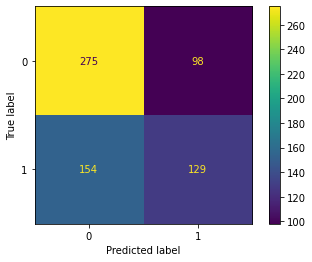

In [16]:
print(plot_confusion_matrix(rf_RandomGrid, X_test, y_test))

In [17]:
cross_val_score(rf_RandomGrid, X_train, y_train, scoring = 'f1', cv= 3).mean()

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


0.6816335464419304

## Creating a Bagging Classifier With Grid Search

In [18]:
n_estimators_bag = [10, 50, 100, 500, 1000]

param_grid_bag = {'n_estimators': n_estimators_bag}


In [19]:
bag_model = BaggingClassifier()

In [22]:
bag_GridSearch = GridSearchCV(bag_model, param_grid = param_grid_bag, cv = 5, n_jobs = -1)

bag_GridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 50, 100, 500, 1000]})

In [23]:
y_pred_bag = bag_GridSearch.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       373
           1       0.56      0.47      0.51       283

    accuracy                           0.61       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.61      0.61      0.61       656



In [25]:
cross_val_score(bag_GridSearch, X_train, y_train, scoring = 'f1', cv= 5).mean()

0.6901529887529196

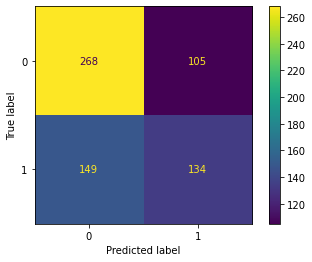

In [26]:
print(plot_confusion_matrix(bag_GridSearch, X_test, y_test))

## Creating Gradient Boosting Classifier With Grid Search

In [27]:
gb_model = GradientBoostingClassifier()

In [28]:
n_estimators_gb = [60,70,80,100,200,300,400,500,600,700]

param_grid_gb = {'n_estimators': n_estimators_gb}

gb_GridSearch = GridSearchCV(gb_model, param_grid = param_grid_gb, cv = 5, n_jobs = -1)

gb_GridSearch.fit(X_train, y_train)

print(gb_GridSearch.best_params_)

{'n_estimators': 700}


In [29]:
y_pred_gb = gb_GridSearch.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       373
           1       0.55      0.51      0.53       283

    accuracy                           0.61       656
   macro avg       0.60      0.59      0.59       656
weighted avg       0.60      0.61      0.60       656



In [31]:
cross_val_score(gb_GridSearch, X_train, y_train, scoring = 'f1', cv= 5).mean()

0.6388511773373892

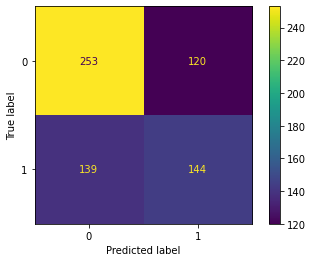

In [32]:
print(plot_confusion_matrix(gb_GridSearch, X_test, y_test))